In [1]:
import os

## Loading the required libraries

In [3]:
# changing the current directory
os.chdir('C:\\Mahaanand\\Machine Learning\\edwisor_machine_learning\\my_projects\\cab_rental')

In [10]:
# importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the cab rental data & data exploration

In [11]:
master_train_cab_df = pd.read_csv('train_cab.csv')

In [12]:
# checking the shape of the data
master_train_cab_df.shape

(16067, 7)

In [13]:
# checking the head of the data
master_train_cab_df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [14]:
# checking the tail of the data
master_train_cab_df.tail()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
16062,6.5,2014-12-12 07:41:00 UTC,-74.008820,40.718757,-73.998865,40.719987,1.0
16063,16.1,2009-07-13 07:58:00 UTC,-73.981310,40.781695,-74.014392,40.715527,2.0
16064,8.5,2009-11-11 11:19:07 UTC,-73.972507,40.753417,-73.979577,40.765495,1.0
16065,8.1,2010-05-11 23:53:00 UTC,-73.957027,40.765945,-73.981983,40.779560,1.0
16066,8.5,2011-12-14 06:24:33 UTC,-74.002111,40.729755,-73.983877,40.761975,NaN


In [15]:
# checking the data information
master_train_cab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16067 entries, 0 to 16066
Data columns (total 7 columns):
fare_amount          16043 non-null object
pickup_datetime      16067 non-null object
pickup_longitude     16067 non-null float64
pickup_latitude      16067 non-null float64
dropoff_longitude    16067 non-null float64
dropoff_latitude     16067 non-null float64
passenger_count      16012 non-null float64
dtypes: float64(5), object(2)
memory usage: 878.8+ KB


In [16]:
# checking the data columns
master_train_cab_df.columns #Inferences - No need to change or rename any variable

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [17]:
# describing the data
master_train_cab_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


In [18]:
# checking the data type of each variable
master_train_cab_df.dtypes

fare_amount           object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

## Data Preprocessing

In [19]:
# converting the target variable fare_amount from categorical to numeric
master_train_cab_df['fare_amount'] = pd.to_numeric(master_train_cab_df['fare_amount'], errors='coerce')

In [20]:
# creating a new train dataframe for preprocessing
train_preprocessing_df = master_train_cab_df.copy()

In [21]:
# converting the pickup_datetime to datetime object
train_preprocessing_df['pickup_datetime'] = pd.to_datetime(train_preprocessing_df['pickup_datetime'], 
                                                           format = '%Y-%m-%d %H:%M:%S UTC', errors='coerce')

### Missing value analysis

In [22]:
train_preprocessing_df.isnull().sum()

fare_amount          25
pickup_datetime       1
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count      55
dtype: int64

In [23]:
# calculating the missing value percentage
missing_val_df = pd.DataFrame(train_preprocessing_df.isnull().sum())

# resetting the index
missing_val_df = missing_val_df.reset_index()

#renaming the columns
missing_val_df = missing_val_df.rename(columns = {'index':'variables', 0:'missing_cnt'})

In [24]:
# calculating the percent of missing values
missing_val_df['missing_perc'] = (missing_val_df['missing_cnt']/len(train_preprocessing_df))*100

In [25]:
# sorting the values based on the missing_perc
missing_val_df = missing_val_df.sort_values('missing_perc', ascending=False).reset_index(drop=True)

In [26]:
missing_val_df

,variables,missing_cnt,missing_perc
0,passenger_count,55,0.342317
1,fare_amount,25,0.155598
2,pickup_datetime,1,0.006224
3,pickup_longitude,0,0.000000
4,pickup_latitude,0,0.000000
5,dropoff_longitude,0,0.000000
6,dropoff_latitude,0,0.000000


In [ ]:
'''
Inferences:
1. The maximum missing value percentage in the data is (.3%) 
2. since the missing value percentage is very low dropping the variable
'''

In [27]:
# dropping the missing value variables
train_preprocessing_df = train_preprocessing_df.drop(train_preprocessing_df[train_preprocessing_df['passenger_count'].isnull()].index, axis=0)
train_preprocessing_df = train_preprocessing_df.drop(train_preprocessing_df[train_preprocessing_df['fare_amount'].isnull()].index, axis=0)
train_preprocessing_df = train_preprocessing_df.drop(train_preprocessing_df[train_preprocessing_df['pickup_datetime'].isnull()].index, axis=0)

In [28]:
# checking the shape of the data
train_preprocessing_df.shape

(15986, 7)

### Outlier analysis

In [29]:
# copying the data to the master data
master_train_cab_df = train_preprocessing_df.copy()

In [30]:
# continuous variables
cnames = ['fare_amount', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 
          'passenger_count']

In [31]:
%matplotlib inline

fare_amount


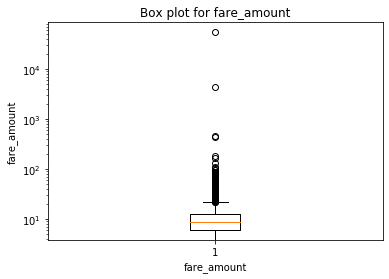

pickup_longitude


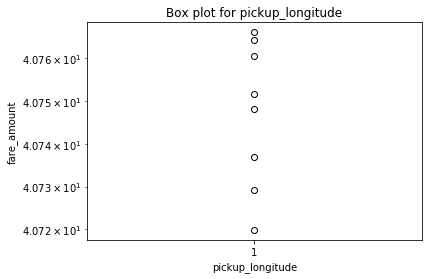

pickup_latitude


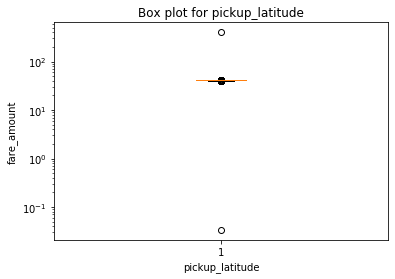

dropoff_longitude


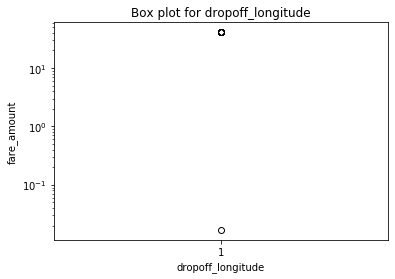

dropoff_latitude


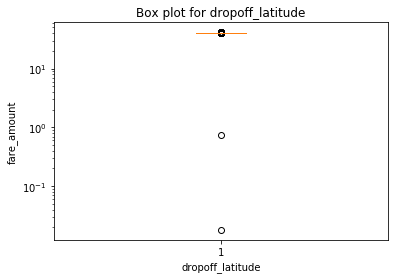

passenger_count


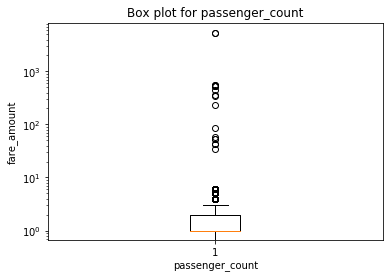

In [32]:
# plotting box plot for all the continuous variables
for i in cnames:
    print(i)
    plt.boxplot(train_preprocessing_df[i])
    plt.xlabel(i)
    plt.ylabel('fare_amount')
    plt.yscale('log')
    plt.title(f'Box plot for {i}')
    plt.show()

In [ ]:
'''
Inferences:
1. Each continuous variable suffers from severe outliers.
2. Finding the outliers and remove them is necessary
'''

In [33]:
# pre-defined function for finding Interquartile, lower and upper limit values
def cal_outlier_range(var):
    q25, q75 = np.percentile(train_preprocessing_df[var], [25,75])
    iqr = q75 - q25
    
    low_lim = q25 - (iqr * 1.5)
    upp_lim = q75 + (iqr * 1.5)
    
    return (low_lim, upp_lim)

#### Treating outlier(fare_amount)

In [34]:
# calculating outlier for fare_amount
train_preprocessing_df['fare_amount'].describe()

count    15986.000000
mean        15.030453
std        431.213944
min         -3.000000
25%          6.000000
50%          8.500000
75%         12.500000
max      54343.000000
Name: fare_amount, dtype: float64

In [35]:
# lower limit and upper limit for fare_amount
low_lim,upp_lim = cal_outlier_range('fare_amount')

In [36]:
print(low_lim, upp_lim)

-3.75 22.25


In [37]:
# treating outliers
train_preprocessing_df.loc[train_preprocessing_df['fare_amount'] < low_lim,'fare_amount'] = low_lim
train_preprocessing_df.loc[train_preprocessing_df['fare_amount'] > upp_lim,'fare_amount'] = upp_lim

In [38]:
# since there are some negative fare_amounts it may cause the model to behave in different way
train_preprocessing_df = train_preprocessing_df.drop(train_preprocessing_df.loc[train_preprocessing_df['fare_amount']<=0.01].index, axis=0)

In [39]:
train_preprocessing_df['fare_amount'].describe()

count    15981.000000
mean        10.065562
std          5.459774
min          1.140000
25%          6.000000
50%          8.500000
75%         12.500000
max         22.250000
Name: fare_amount, dtype: float64

#### Treating outlier(pickup_longitude)

In [40]:
# Lower and upper limit for pickup_longitude
p_long_low_lim, p_long_upp_lim = cal_outlier_range('pickup_longitude')

In [41]:
print(p_long_low_lim, p_long_upp_lim)

-74.030119 -73.928847


In [42]:
train_preprocessing_df['pickup_longitude'].describe()

count    15981.000000
mean       -72.463889
std         10.575215
min        -74.438233
25%        -73.992142
50%        -73.981689
75%        -73.966824
max         40.766125
Name: pickup_longitude, dtype: float64

In [43]:
# treating outliers
train_preprocessing_df.loc[train_preprocessing_df['pickup_longitude'] < p_long_low_lim, 'pickup_longitude'] = p_long_low_lim
train_preprocessing_df.loc[train_preprocessing_df['pickup_longitude'] > p_long_upp_lim, 'pickup_longitude'] = p_long_upp_lim

In [44]:
train_preprocessing_df['pickup_longitude'].describe()

count    15981.000000
mean       -73.978099
std          0.020738
min        -74.030119
25%        -73.992142
50%        -73.981689
75%        -73.966824
max        -73.928847
Name: pickup_longitude, dtype: float64

#### Treating outlier(pickup_latitude)

In [45]:
train_preprocessing_df['pickup_latitude'].describe()

count    15981.000000
mean        39.915328
std          6.830082
min        -74.006893
25%         40.734938
50%         40.752615
75%         40.767363
max        401.083332
Name: pickup_latitude, dtype: float64

In [46]:
# lower and upper limit for pickup_latitude
p_low_lat_lim, p_upp_lat_lim = cal_outlier_range('pickup_latitude')

In [47]:
print(p_low_lat_lim, p_upp_lat_lim)

40.686300499999994 40.81600050000001


In [48]:
# Treating outliers
train_preprocessing_df.loc[train_preprocessing_df['pickup_latitude'] < p_low_lat_lim, 'pickup_latitude'] = p_low_lat_lim
train_preprocessing_df.loc[train_preprocessing_df['pickup_latitude'] > p_upp_lat_lim, 'pickup_latitude'] = p_upp_lat_lim

In [49]:
train_preprocessing_df['pickup_latitude'].describe()

count    15981.000000
mean        40.750294
std          0.025829
min         40.686300
25%         40.734938
50%         40.752615
75%         40.767363
max         40.816001
Name: pickup_latitude, dtype: float64

#### Treating outlier(dropoff_longitude)

In [50]:
train_preprocessing_df['dropoff_longitude'].describe()

count    15981.000000
mean       -72.463445
std         10.571877
min        -74.429332
25%        -73.991182
50%        -73.980167
75%        -73.963646
max         40.802437
Name: dropoff_longitude, dtype: float64

In [51]:
#lower and upper limit for dropoff_longitude
d_long_low_lim, d_long_upp_lim = cal_outlier_range('dropoff_longitude')

In [52]:
print(d_long_low_lim, d_long_upp_lim)

-74.03248608999998 -73.92234185000002


In [53]:
# Treating outliers
train_preprocessing_df.loc[train_preprocessing_df['dropoff_longitude'] < d_long_low_lim, 'dropoff_longitude'] = d_long_low_lim
train_preprocessing_df.loc[train_preprocessing_df['dropoff_longitude'] > d_long_upp_lim, 'dropoff_longitude'] = d_long_upp_lim

In [54]:
train_preprocessing_df['pickup_longitude'].describe()

count    15981.000000
mean       -73.978099
std          0.020738
min        -74.030119
25%        -73.992142
50%        -73.981689
75%        -73.966824
max        -73.928847
Name: pickup_longitude, dtype: float64

#### Treating outlier(dropoff_latitude)

In [55]:
train_preprocessing_df['dropoff_latitude'].describe()

count    15981.000000
mean        39.898418
std          6.187326
min        -74.006377
25%         40.734663
50%         40.753563
75%         40.768011
max         41.366138
Name: dropoff_latitude, dtype: float64

In [56]:
# Lower and upper limit for dropoff_latitude
d_lat_low_lim, d_lat_upp_lim = cal_outlier_range('dropoff_latitude')

In [57]:
print(d_lat_low_lim, d_lat_upp_lim)

40.68464099999999 40.81803300000001


In [58]:
# treating outliers
train_preprocessing_df.loc[train_preprocessing_df['dropoff_latitude'] < d_lat_low_lim, 'dropoff_latitude'] = d_lat_low_lim
train_preprocessing_df.loc[train_preprocessing_df['dropoff_latitude'] > d_lat_upp_lim, 'dropoff_latitude'] = d_lat_upp_lim

In [59]:
train_preprocessing_df['dropoff_latitude'].describe()

count    15981.000000
mean        40.750575
std          0.028225
min         40.684641
25%         40.734663
50%         40.753563
75%         40.768011
max         40.818033
Name: dropoff_latitude, dtype: float64

#### Dumping the data into a file for future reference

In [60]:
from pickle import load, dump

In [61]:
dump(train_preprocessing_df, open('train_preprocessing_df_data', 'wb'))
dump(master_train_cab_df, open('master_train_cab_df_data', 'wb'))

#### Treating outlier(passenger_count)

In [62]:
train_preprocessing_df['passenger_count'].describe()

count    15981.000000
mean         2.623592
std         60.901659
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       5345.000000
Name: passenger_count, dtype: float64

In [63]:
#lower and upper limit for passenger_count
psg_cnt_low_lim, psg_cnt_upp_lim = cal_outlier_range('passenger_count')
print(psg_cnt_low_lim, psg_cnt_upp_lim)

-0.5 3.5


In [64]:
#treating outliers
train_preprocessing_df.loc[train_preprocessing_df['passenger_count'] < 1, 'passenger_count'] = np.nan
train_preprocessing_df.loc[train_preprocessing_df['passenger_count'] > 6, 'passenger_count'] = psg_cnt_upp_lim

In [65]:
# dropping the nan values
train_preprocessing_df = train_preprocessing_df.drop(train_preprocessing_df[train_preprocessing_df['passenger_count'].isnull()].index, axis=0)

fare_amount


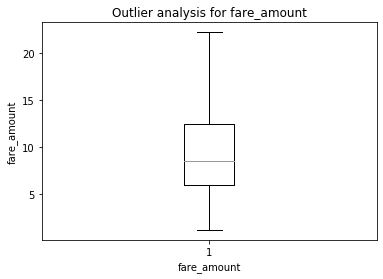

pickup_longitude


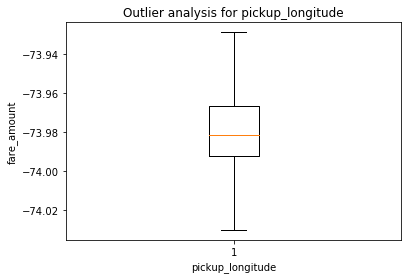

pickup_latitude


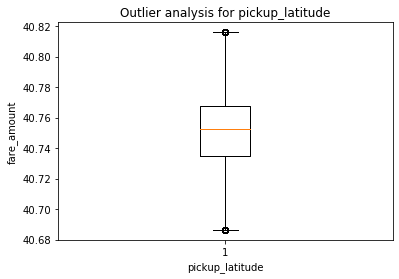

dropoff_longitude


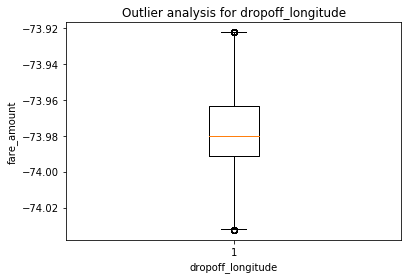

dropoff_latitude


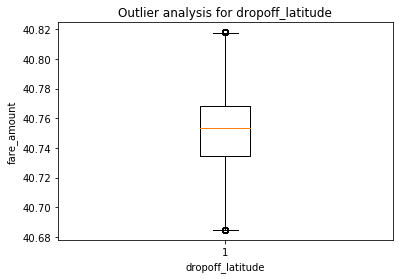

passenger_count


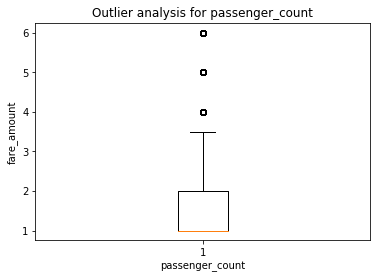

In [66]:
# Visualizing the box plot again to check for the outliers
for i in cnames:
    print(i)
    plt.boxplot(train_preprocessing_df[i])
    plt.xlabel(i)
    plt.ylabel('fare_amount')
    plt.title(f'Outlier analysis for {i}')
    plt.show()

### Feature Engineering

#### Deriving a variable distance using the co-ordinates

In [71]:
# importing the geopy library to compute the distance
import geopy.distance

In [140]:
# calculated distance b/w two co-ordinates
train_preprocessing_df['distance'] = train_preprocessing_df.apply(
    lambda x: geopy.distance.distance((x['pickup_latitude'], x['pickup_longitude']), 
                                      (x['dropoff_latitude'], x['dropoff_longitude'])).km,axis=1)

In [142]:
# viewing the shape of the df
train_preprocessing_df.shape

(15923, 8)

In [143]:
# adding more features to the data
train_preprocessing_df['year_of_travel'] = train_preprocessing_df['pickup_datetime'].dt.year

train_preprocessing_df['month_of_travel'] = train_preprocessing_df['pickup_datetime'].dt.month

train_preprocessing_df['date_of_travel'] = train_preprocessing_df['pickup_datetime'].dt.date

train_preprocessing_df['day_of_week'] = train_preprocessing_df['pickup_datetime'].dt.dayofweek

train_preprocessing_df['hour'] = train_preprocessing_df['pickup_datetime'].dt.hour

#### Treating outlier for Distance

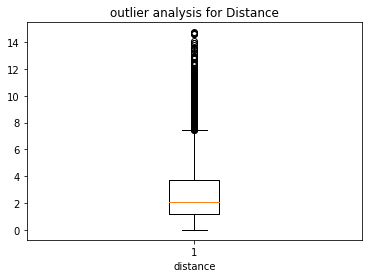

In [147]:
# Creating box plot to detect outliers on variable feature
plt.boxplot(train_preprocessing_df['distance'])
plt.xlabel('distance')
plt.title('outlier analysis for Distance')
plt.show()

In [ ]:
# For future reference
'''
replace the distance having value less than 1 with the computed mean of the whole distance
'''

In [ ]:
# Inferences:
'''
The completely preprocessed data is train_preprocessing_df
dumping the data in master_train_cab_df
'''

In [156]:
# dropping the pickup_datetime variable since we have extracted the necessary features from the variable
train_preprocessing_df = train_preprocessing_df.drop('pickup_datetime', axis=1)

In [159]:
# copying the preprocessed data into the master data
master_train_cab_df = train_preprocessing_df.copy()

In [161]:
# dumping the master data into the pickle file
dump(master_train_cab_df,open('master_complete_preprocessed_cab_rent_data', 'wb'))

### Exploratory analysis 

#### Univariate analysis

In [163]:
# using histogram to check for the distribution of the data
# creating a pre-defined function for creating a histogram plot
def create_hist_plot(col_name):
    plt.hist(train_preprocessing_df[col_name])
    plt.xlabel(col_name)
    plt.title(f'Distribution of variable {col_name}')
    plt.show()

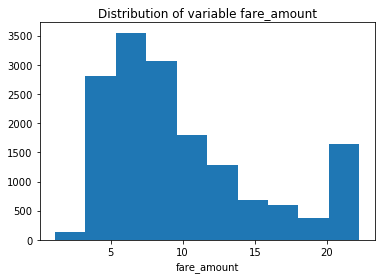

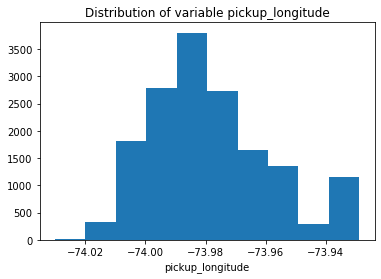

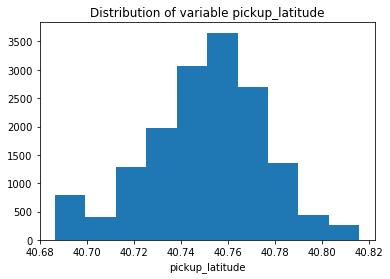

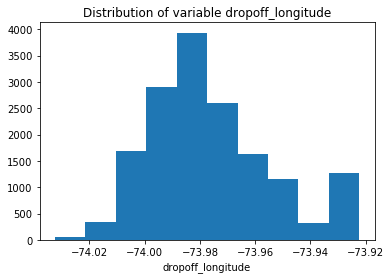

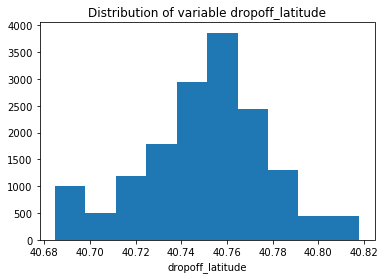

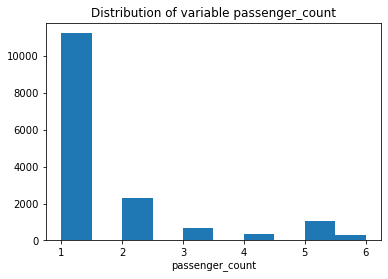

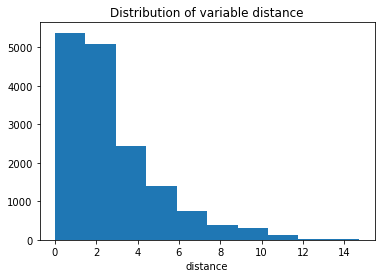

In [165]:
hist_list = ['fare_amount', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'distance']

for i in hist_list:
    create_hist_plot(i)

#### Bivariate Analysis

Text(0.5, 1.0, 'Bivariate analysis between year and cab fare')

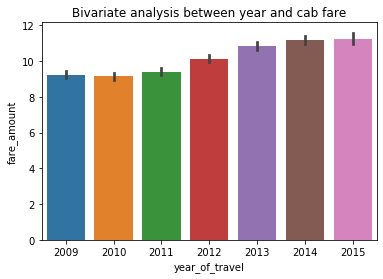

In [178]:
sns.barplot(train_preprocessing_df['year_of_travel'], train_preprocessing_df['fare_amount'])
plt.title('Bivariate analysis between year and cab fare')

In [181]:
# pre-defined function for creating barplot
def create_bar_plot(col_name):
    sns.barplot(train_preprocessing_df[col_name], train_preprocessing_df['fare_amount'])
    plt.title(f'Bivariate analysis between {col_name} and cab_fare_amount')
    plt.show()

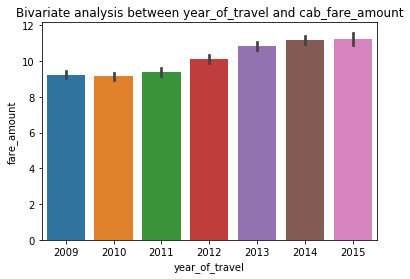

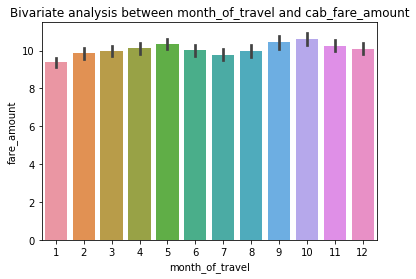

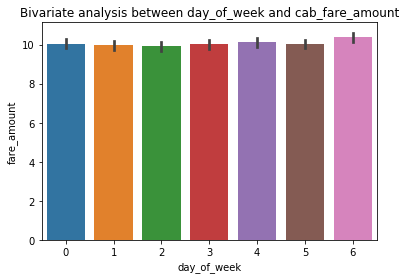

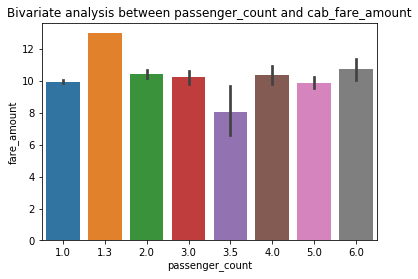

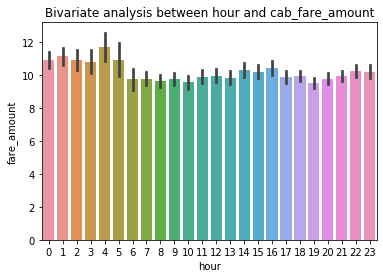

In [188]:
bar_plot_list = ['year_of_travel', 'month_of_travel', 'day_of_week', 'passenger_count', 'hour']
for i in bar_plot_list:
    create_bar_plot(i)

In [189]:
#creating a pre-defined function for scatter plot
def create_scatter_plot(col_name):
    sns.jointplot(train_preprocessing_df[col_name], train_preprocessing_df['fare_amount'], kind='scatter')
    plt.title(f'Bivariate analysis between {col_name} and cab_fare_amount')
    plt.show()

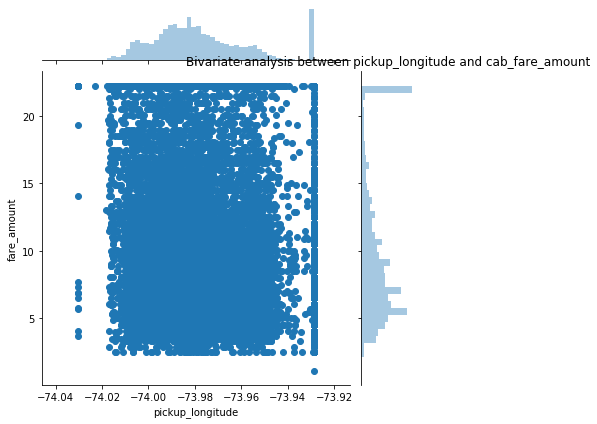

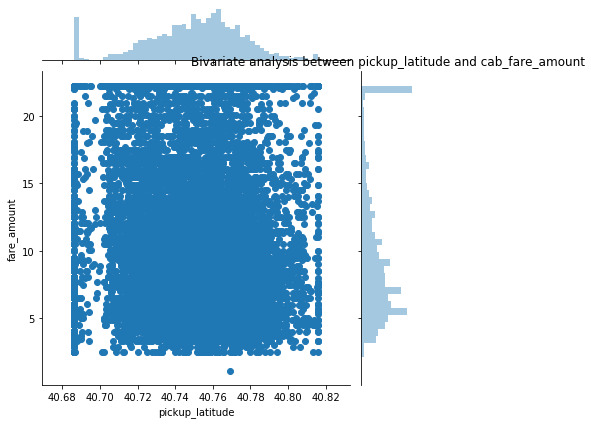

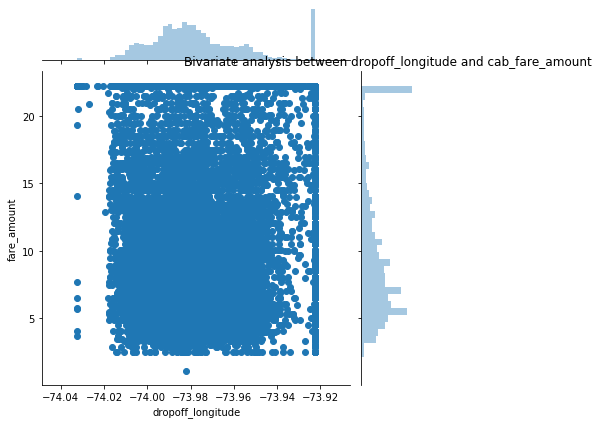

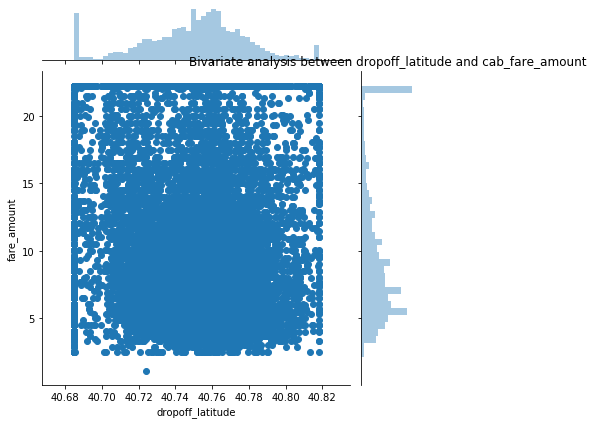

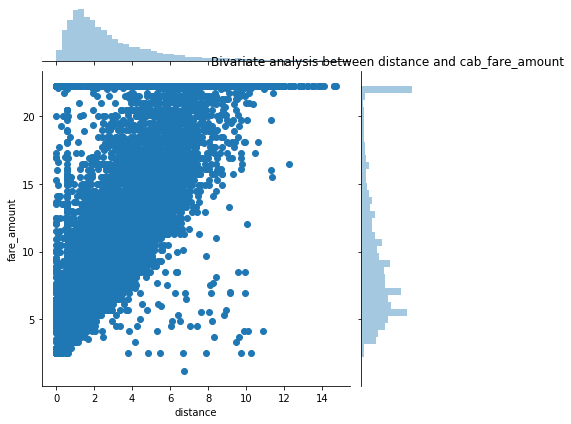

In [190]:
scatter_plot_list = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'distance']
for i in scatter_plot_list:
    create_scatter_plot(i)

### Feature selection

In [191]:
train_preprocessing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15923 entries, 0 to 16065
Data columns (total 12 columns):
fare_amount          15923 non-null float64
pickup_longitude     15923 non-null float64
pickup_latitude      15923 non-null float64
dropoff_longitude    15923 non-null float64
dropoff_latitude     15923 non-null float64
passenger_count      15923 non-null float64
distance             15923 non-null float64
year_of_travel       15923 non-null int64
month_of_travel      15923 non-null int64
date_of_travel       15923 non-null object
day_of_week          15923 non-null int64
hour                 15923 non-null int64
dtypes: float64(7), int64(4), object(1)
memory usage: 2.2+ MB


In [195]:
# converting the variables into its required datatype
train_preprocessing_df['passenger_count'] = train_preprocessing_df['passenger_count'].astype('int64')

train_preprocessing_df['year_of_travel'] = train_preprocessing_df['year_of_travel'].astype('object')

train_preprocessing_df['month_of_travel'] = train_preprocessing_df['month_of_travel'].astype('object')

train_preprocessing_df['date_of_travel'] = train_preprocessing_df['date_of_travel'].astype('object')

train_preprocessing_df['day_of_week'] = train_preprocessing_df['day_of_week'].astype('object')

train_preprocessing_df['hour'] = train_preprocessing_df['hour'].astype('object')

In [196]:
train_preprocessing_df.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
distance             float64
year_of_travel        object
month_of_travel       object
date_of_travel        object
day_of_week           object
hour                  object
dtype: object

In [197]:
# splitting the continuous and categorical variables
cnames = ['fare_amount', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'distance']
cat_names = ['year_of_travel', 'month_of_travel', 'date_of_travel', 'day_of_week', 'hour']

#### Correlation plot for analyzing continuouos variables

In [199]:
# creating correaltion plot for continuous variables
train_corr_df = train_preprocessing_df.loc[:, cnames]

In [202]:
corr = train_corr_df.corr()
print(corr)

                   fare_amount  pickup_longitude  pickup_latitude  \
fare_amount           1.000000          0.146620        -0.112741   
pickup_longitude      0.146620          1.000000         0.260565   
pickup_latitude      -0.112741          0.260565         1.000000   
dropoff_longitude     0.234238          0.422544         0.040175   
dropoff_latitude     -0.104740          0.073255         0.513602   
passenger_count       0.015248         -0.005258        -0.002392   
distance              0.792645          0.040045        -0.073899   

                   dropoff_longitude  dropoff_latitude  passenger_count  \
fare_amount                 0.234238         -0.104740         0.015248   
pickup_longitude            0.422544          0.073255        -0.005258   
pickup_latitude             0.040175          0.513602        -0.002392   
dropoff_longitude           1.000000          0.251747        -0.008274   
dropoff_latitude            0.251747          1.000000        -0.001958 

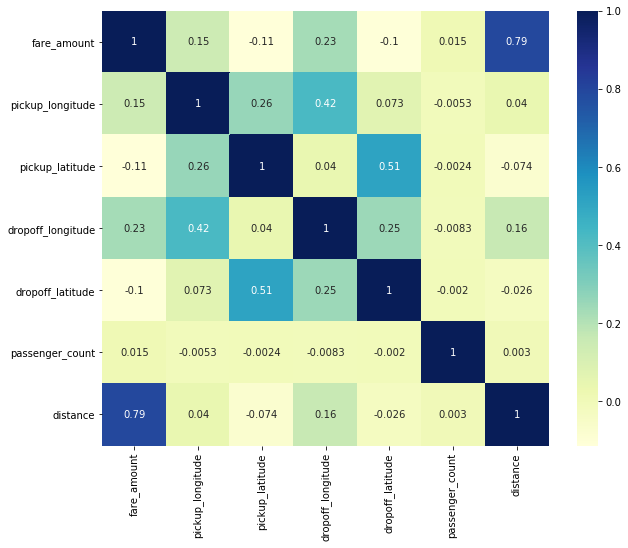

In [203]:
# creating a heatmap for correlation plot visualization
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='YlGnBu', annot=True)

In [ ]:
# Inferences
'''
1.There is a positive correlation between distance and fare_amount. so distance is a main important feature to the model creation
'''

In [217]:
# chi-square contigency analysis for categorical variables
from scipy.stats import chi2_contingency
for i in cat_names:
    chi2, p, dof,ex = chi2_contingency(pd.crosstab(train_preprocessing_df['fare_amount'], train_preprocessing_df[i]))
    print(f'{i} : p-value is {p}')

year_of_travel : p-value is 0.0
month_of_travel : p-value is 4.120623700310611e-06
date_of_travel : p-value is 7.345635412303365e-08
day_of_week : p-value is 0.383338688356686
hour : p-value is 8.61403595891451e-08


In [210]:
'''
Inferences:
1. From the above chi-square test, we could conclude that p value of day_of_week variable < 0.05 -> dropping the day_of_week variable for the creation of model
'''

In [218]:
# dropping the column day_of_week
train_preprocessing_df = train_preprocessing_df.drop('day_of_week', axis=1)

In [220]:
train_preprocessing_df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,year_of_travel,month_of_travel,date_of_travel,hour
0,4.5,-73.928847,40.721319,-73.922342,40.712278,1,1.144599,2009,6,2009-06-15,17
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,8.443441,2010,1,2010-01-05,16
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,1.389132,2011,8,2011-08-18,0
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2.795790,2012,4,2012-04-21,4
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,1.998338,2010,3,2010-03-09,7


In [221]:
# copying the train data back to the master data and dumping it into the file
master_train_cab_df = train_preprocessing_df.copy()
dump(master_train_cab_df, open('master_feature_selected_data', 'wb'))

In [247]:
train_preprocessing_df = load(open('master_feature_selected_data','rb'))

In [253]:
# computing the distance less than 1 km with their mean
train_preprocessing_df.loc[train_preprocessing_df['distance']<1, 'distance'] = train_preprocessing_df['distance'].mean()

### Feature scaling

In [255]:
# checking for normatlity distribution of the data
# creating a pre-defined function for distplot
def create_dist_plot(i):
    sns.distplot(train_preprocessing_df[i], bins='auto', color='blue')
    plt.title(f'Normality check for the data {i}')
    plt.show()

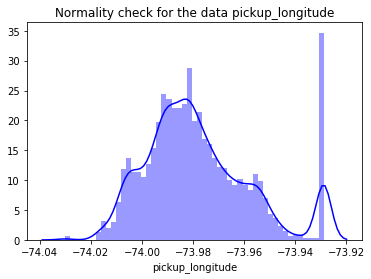

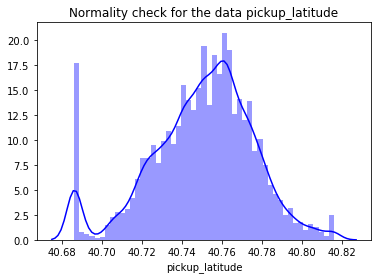

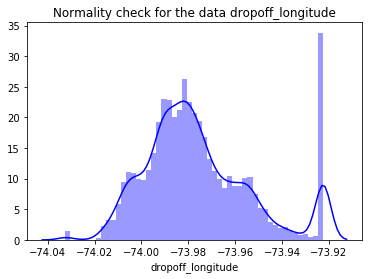

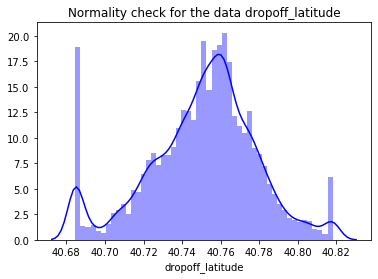

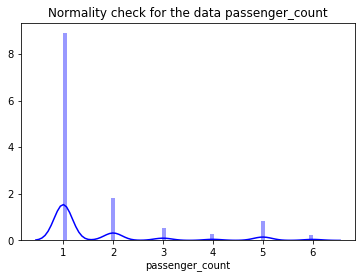

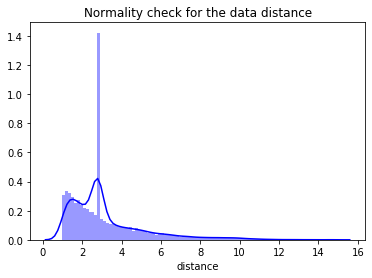

In [256]:
dist_plt_list = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'distance']
for i in dist_plt_list:
    create_dist_plot(i)

In [ ]:
'''
Inferences:
1. since the distance variable is right skewed, taking a log transformation
'''

In [257]:
train_preprocessing_df['log_distance'] = np.log(train_preprocessing_df['distance'])

In [258]:
train_preprocessing_df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,year_of_travel,month_of_travel,date_of_travel,hour,log_distance
0,4.5,-73.928847,40.721319,-73.922342,40.712278,1,1.144599,2009,6,2009-06-15,17,0.135054
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,8.443441,2010,1,2010-01-05,16,2.133390
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,1.389132,2011,8,2011-08-18,0,0.328679
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2.795790,2012,4,2012-04-21,4,1.028115
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,1.998338,2010,3,2010-03-09,7,0.692316


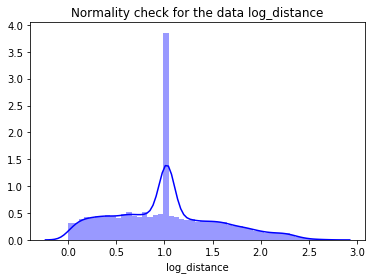

In [259]:
# viewing the plot again for checking distance distribution
create_dist_plot('log_distance')

In [260]:
# since the log_distance is normally distributed dropping the distance data
train_preprocessing_df = train_preprocessing_df.drop('distance', axis=1)

In [287]:
# dropping the date_of_travel since it is a datetime object
train_preprocessing_df = train_preprocessing_df.drop('date_of_travel', axis=1)

In [288]:
# copying and dumping into the file
master_train_cab_df = train_preprocessing_df.copy()
dump(master_train_cab_df, open('master_feature_scaled_cab_data', 'wb'))

### Model Development

#### splitting the data into train and test data

In [291]:
print(train_preprocessing_df.columns)

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'year_of_travel', 'month_of_travel', 'hour', 'log_distance'],
      dtype='object')


In [292]:
independent_columns = train_preprocessing_df.columns[1:]

In [293]:
# X and y data
X = train_preprocessing_df.loc[:, independent_columns]
y = train_preprocessing_df['fare_amount']

In [294]:
from sklearn.model_selection import train_test_split

In [295]:
# splitting into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Building a linear regression model

In [296]:
# importing the linear regression model
from sklearn.linear_model import LinearRegression

In [297]:
# building up the regression model
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [298]:
# printing the coef of each variable
print(lm.coef_)

[ 1.63417932e+01 -5.65311972e+00  2.07620853e+01 -1.40748191e+01
  7.81823175e-02  3.81240227e-01  6.69329490e-02  6.49539913e-03
  6.77466096e+00]


In [299]:
# making predictions on test dataset
lr_predictions = lm.predict(X_test)

In [304]:
lr_predictions[0:6]

array([ 7.60114466, 11.19978439,  3.93603972,  6.78186637, 13.82725865,
        4.60848934])

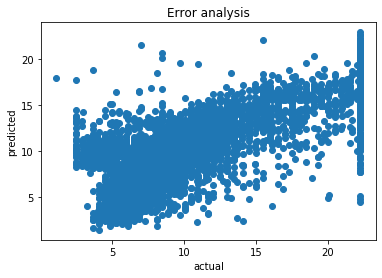

In [307]:
# scatter plot to visualize the error 
plt.scatter(y_test, lr_predictions)
plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('Error analysis')
plt.show()

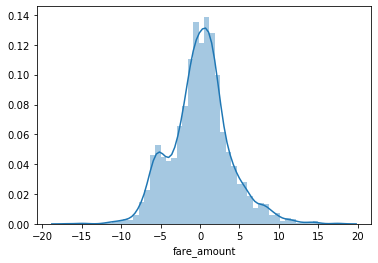

In [308]:
# distribution of prediction
sns.distplot((y_test - lr_predictions))

##### Calculating metrics to check the model predictions

In [309]:
from sklearn import metrics

In [310]:
# finding root mean square error for lr
rmse_lr = np.sqrt(metrics.mean_squared_error(y_test, lr_predictions))
print(rmse_lr)

3.7787518207488673


In [311]:
# r2 score
r2_lr = metrics.r2_score(y_test, lr_predictions)
print(r2_lr)

0.5282178686316694


In [312]:
#mean absolute error
mae_lr = metrics.mean_absolute_error(y_test, lr_predictions)
print(mae_lr)

2.8444137808072925


In [314]:
#mape function
def calc_mape(y_pred, y_true):
    return np.mean(np.abs((y_true - y_pred)/y_true))

In [315]:
# calculate mape
mape_lr = calc_mape(lr_predictions, y_test)
print(mape_lr)

0.3849874919205042


In [316]:
# summary of Linear regression metrics
lr_metrics = {'rmse_lr': rmse_lr, 'r2_lr': r2_lr, 'mae_lr': mae_lr, 'mape_lr':mape_lr}
print(lr_metrics)

{'rmse_lr': 3.7787518207488673, 'r2_lr': 0.5282178686316694, 'mae_lr': 2.8444137808072925, 'mape_lr': 0.3849874919205042}


In [413]:
# dumping the linear model into the file
dump(lm, open('linear_model', 'wb'))

#### Building a Decision tree regression model

In [318]:
#Importing the required library for decision tree regression
from sklearn.tree import DecisionTreeRegressor

In [342]:
# building the model
dt_model = DecisionTreeRegressor(max_depth=15).fit(X_train, y_train)

In [343]:
# predicting the output on test data
dt_predictions = dt_model.predict(X_test)

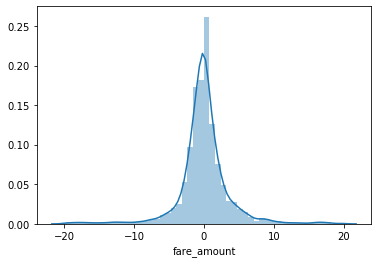

In [349]:
# visulaizing distplot for error distribution
sns.distplot((y_test - dt_predictions))

In [345]:
# calculating metrics
rmse_dt = np.sqrt(metrics.mean_squared_error(y_test, dt_predictions))
print(rmse_dt)

3.6948432358319314


In [346]:
r2_dt = metrics.r2_score(y_test, dt_predictions)
print(r2_dt)

0.5489374372337904


In [347]:
mae_dt = metrics.mean_absolute_error(y_test, dt_predictions)
print(mae_dt)

2.1984145918423055


In [348]:
mape_dt = calc_mape(dt_predictions, y_test)
print(mape_dt)

0.2639948003759512


In [350]:
# final metrics results
dt_metrics = {'rmse_dt': rmse_dt, 'r2_dt':r2_dt, 'mae_dt': mae_dt, 'mape_dt': mape_dt}

#### Building a random forest model

In [352]:
# importing the required model
from sklearn.ensemble import RandomForestRegressor

In [353]:
# building the model
rf_model = RandomForestRegressor(n_estimators=200).predict(X_train, y_train)

In [ ]:
# predictions on the model
rf_predictions = rf_model.predict(X_test)

In [360]:
rf_metrics = {}

In [361]:
# calculating metrics
rf_metrics['rmse_rf'] = np.sqrt(metrics.mean_squared_error(y_test, rf_predictions))
rf_metrics['r2_rf'] = metrics.r2_score(y_test, rf_predictions)
rf_metrics['mae_rf'] = metrics.mean_absolute_error(y_test, rf_predictions)
rf_metrics['mape_rf'] = calc_mape(rf_predictions, y_test)

In [362]:
rf_metrics

{'rmse_rf': 2.749233859325817,
 'r2_rf': 0.7502714950531053,
 'mae_rf': 1.7856623950825883,
 'mape_rf': 0.2152540052128927}

In [412]:
# dumping the models into a file
dump(dt_model, open('dt_cab_rental_model', 'wb'))
dump(rf_model, open('rf_cab_rental_model', 'wb'))

In [364]:
# Error _metrics
error_metrics = {'rmse': [rmse_lr, rmse_dt, rmse_rf], 
                 'r2_score': [r2_lr, r2_dt, r2_rf],
                 'mae': [mae_lr, mae_dt, mae_rf], 
                 'mape': [mape_lr, mape_dt, mape_rf]
                }

error_metrics_df = pd.DataFrame(error_metrics, index=['Linear Regression', 'Decision Tree', 'Random Forest'])
print(error_metrics_df)

                       rmse  r2_score       mae      mape
Linear Regression  3.778752  0.528218  2.844414  0.384987
Decision Tree      3.694843  0.548937  2.198415  0.263995
Random Forest      2.749234  0.750271  1.785662  0.215254


In [ ]:
'''
Inferences:
1. Random forest model proves to be the best among the three models
2. Using the Random forest model to predict the fare amount with the unseen data
'''

### Cab fare prediction model evaluation with the new test dataset

In [365]:
# going through the same steps to predict the fare_amount of the data
test_new_df = pd.read_csv('test.csv')

In [366]:
test_new_df.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [368]:
test_new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 6 columns):
pickup_datetime      9914 non-null object
pickup_longitude     9914 non-null float64
pickup_latitude      9914 non-null float64
dropoff_longitude    9914 non-null float64
dropoff_latitude     9914 non-null float64
passenger_count      9914 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 464.8+ KB


In [369]:
test_new_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [370]:
test_new_df.columns

Index(['pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [371]:
# converting the pickup_datetime to type datetime
test_new_df['pickup_datetime'] = pd.to_datetime(test_new_df['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC')
print(test_new_df.dtypes)

pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
dtype: object


In [372]:
# checking for missing values
test_new_df.isnull().sum()

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [373]:
# feature engineering the data
test_new_df['year_of_travel'] = test_new_df['pickup_datetime'].dt.year

test_new_df['month_of_travel'] = test_new_df['pickup_datetime'].dt.month

test_new_df['date_of_travel'] = test_new_df['pickup_datetime'].dt.day

test_new_df['day_of_travel'] = test_new_df['pickup_datetime'].dt.dayofweek

test_new_df['hour'] = test_new_df['pickup_datetime'].dt.hour

In [377]:
# calculating distance
test_new_df['distance'] = test_new_df.apply(
    lambda x: geopy.distance.distance((x['pickup_latitude'], x['pickup_longitude']), 
                                      (x['dropoff_latitude'], x['dropoff_longitude'])).km,axis=1)

In [378]:
test_new_df.columns

Index(['pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'year_of_travel', 'month_of_travel', 'date_of_travel', 'day_of_travel',
       'hour', 'distance'],
      dtype='object')

In [385]:
#calculating the distance less than 1 with the distance mean
test_new_df.loc[test_new_df['distance'] < 1, 'distance'] = test_new_df['distance'].mean()

In [387]:
# dropping the variables as like in train data
test_new_df = test_new_df.drop(['pickup_datetime', 'date_of_travel', 'day_of_travel'], axis=1)

In [391]:
train_preprocessing_df.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
year_of_travel        object
month_of_travel       object
hour                  object
log_distance         float64
dtype: object

In [392]:
test_new_df.dtypes

pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
year_of_travel         int64
month_of_travel        int64
hour                   int64
distance             float64
dtype: object

In [393]:
# converting the year, month and hour into its required datatype
test_new_df['year_of_travel'] = test_new_df['year_of_travel'].astype('object')

test_new_df['month_of_travel'] = test_new_df['month_of_travel'].astype('object')

test_new_df['hour'] = test_new_df['hour'].astype('object')

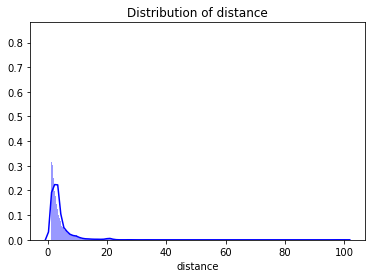

In [395]:
# visualizing distribution of distance
sns.distplot(test_new_df['distance'], bins='auto', color='blue')
plt.title('Distribution of distance')
plt.show()

In [397]:
# taking the log transformation to normalize the data
test_new_df['log_distance'] = np.log(test_new_df['distance'])

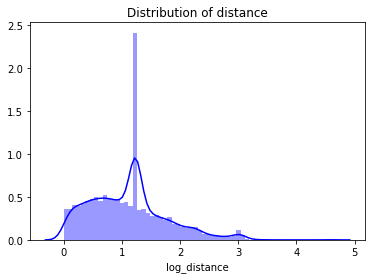

In [404]:
sns.distplot(test_new_df['log_distance'], bins='auto', color='blue')
plt.title('Distribution of distance')
plt.show()

In [399]:
# dropping the distance variable 
test_new_df = test_new_df.drop('distance', axis=1)

In [402]:
# dumping the processed data into a file
dump(test_new_df, open('test_cab_new_data', 'wb'))

In [405]:
# making predictions using rf_model
fare_predictions = rf_model.predict(test_new_df)

In [407]:
test_new_df['pred_fare_amount'] = fare_predictions

In [408]:
test_new_df.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year_of_travel,month_of_travel,hour,log_distance,pred_fare_amount
0,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,13,0.841994,10.06150
1,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,13,0.885337,9.44625
2,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,11,1.234403,10.71100
3,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,21,0.672776,9.87000
4,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,21,1.683215,17.82850


In [409]:
test_new_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,log_distance,pred_fare_amount
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273,1.097799,11.236127
std,0.042774,0.033541,0.039072,0.035435,1.278747,0.657199,4.575050
min,-74.252193,40.573143,-74.263242,40.568973,1.000000,0.000509,4.756000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000,0.594079,7.692000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000,1.132425,10.180625
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000,1.397572,13.216937
max,-72.986532,41.709555,-72.990963,41.696683,6.000000,4.605803,22.250000


In [411]:
# saving into a csv file
test_new_df.to_csv('predicted_fare_amount.csv', index=False)

----------------------Project Completed successfully---------------------------------